# Exporation of Data; Part 2, multidimensional visualization
## Data Science 350

This notebook contains an introduction to the multidimensional visualization methods data scientists used to explore the relationships between the variables in complex data sets. Data scientists spend a lot of time working on understand the relationships within the variables in the data (**data exporation**). Visualization is a key skill for any data scientist performing these tasks. 

Inherently, computer displayed  graphics are two-dimensional. Yet, we often wish to display mutli-dimensions of a data set to better understand the relationships between the variables. In this lesson we will explore some of the visualization techniques which can be applied to these problems. 

These lessons are divided into several parts. In each part you will learn how to use the visualization tools available in Python.

- **Overview of two dimensional plot types** is a reveiw of creating basic plot types used to construct visualizations. These plots naturally display the relationship between two variables on the 2-d computer graphics display. 
- **Using Aesthetics** is an overview of how to project additional plot dimensions using plot aesthetics. Using aestheics provides a method for projecting additional dimensions onto the 2-d computer graphics display. 
- **Facetted plotting** also know as conditioned plotting or lattice plotting, introduces a powerful method for visualizing higher dimensional data. Arrays of plots of subsets of the data are arranged on the 2-d computer graphics display. 

***
**Important!**  

This notebook was constructed using the Anconda 3.5 Python distribution. If you are not running version Anaconda 3.5 or higher, we suggest you update your Anaconda distribution now.  You can download the Python 3 Anaconda distribution for your operating system from the [Continum Analytics web site](https://www.continuum.io/downloads

To run this notebook you need the Seaborn graphics packages. If you have not done so, you will need to install Seaborn as it is not in the Anaconda distribution as of now. From a command prompt on your computer type the following command. If no errors occur, you will have installed Seaborn.

``pip install seaborn``

or

``conda install seaborn``

You can find more about installing ```seaborn``` can be seen on the [Installing and getting started](http://seaborn.pydata.org/installing.html) page.

***

## About the data set

This data set is from the [Univeristy of California Irving Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Automobile)  The data was compiled by Jeffrey C. Schlimmer from the following sources:

- 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook. 
- Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038 
- Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037


## Load the data set

Let's get started. The function shown in the cell below loads the data from the .csv file. Some minimal clean up is performed on the data. Rows with missing values are dropped and some columns are converted from strings containing numbers to numeric data. The result is a Pandas data frame.

Execute the code in this cell to load the data into your notebook. **Make sure you have the .csv file in your working directory!**

In [1]:
def read_auto_data(fileName = "Automobile price data _Raw_.csv"):
    'Function to load the auto price data set from a .csv file' 
    import pandas as pd
    import numpy as np

    ## Read the .csv file with the pandas read_csv method
    auto_price = pd.read_csv(fileName)
    
    ## Remove rows with missing values, accounting for mising values coded as '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    for column in cols:
        auto_price.loc[auto_price[column] == '?', column] = np.nan
    auto_price.dropna(axis = 0, inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_price[column] = pd.to_numeric(auto_price[column])
        
    return auto_price
auto_price = read_auto_data()

Notice that there are some missing values in the numeric columns by the following steps:
1. A list of the columns with the missing values is created.
2. These data are coded by the `"?"` string. Each case where this strinng  occurs is replaced by a numpy `nan`, a missing value. 
3. Then rows containing `nan` removed from the data frame. 
4. The type of these columns is then coerced to numeric. 

## 2-D plot types

Now that you have loaded and had a first look at the data, its time to get to work making some charts. There are enumerable 2-d chart types that are used for data exploration. When exploring a data set you need to examine multiple views. This process will require using multiple chart types. 

In this lesson you will work with a number of common 2-d chart types. The list below indicates the plots we will explore and an indication about the dimensionality of the plot:

- **Scatter plot** - 2d
- **2d Kernel Density Plots** -2d
- **Hexbin plots** - 2d
- **Line plots** - 2d

The following exercises give you some practice using these chart types. 

## Basic 2-d plots; Scatter plots

A basic scatter plot shows the relationship between two variables. Points are ploted at the x-y coordinates of each value pair. 

The code in the cell below using the Pandas `plot` method to display a scatter plot. Notice the argument `kind = 'scatter'`, which determines the plot type. The `x` and `y` arguments specify the column used for the horizontal and vertical values. Execute the code in the cell below to create a scatter plot of city MPG on the horizontal axis vs. auto price on the vertical axis. 

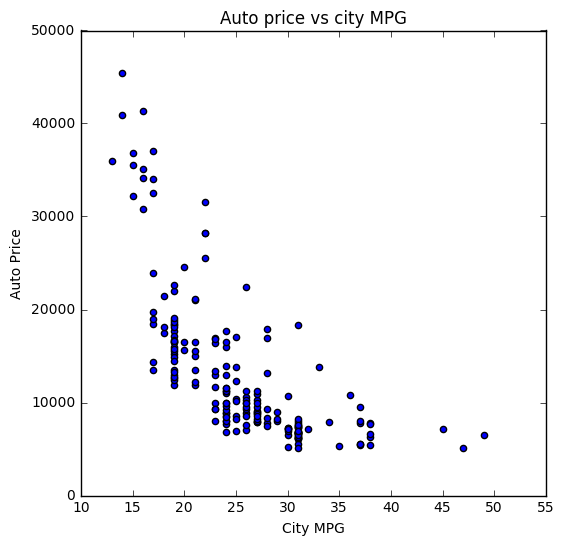

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(6, 6)).gca() # define axis
auto_price.plot.scatter(x = 'city-mpg', y = 'price', ax = ax)
# auto_price.plot(kind = 'scatter', x = 'city-mpg', y = 'price', ax = ax)
ax.set_title('Auto price vs city MPG') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
ax.set_xlabel('City MPG')

The scatter plot shows the relationship between price and city MPG. The relationship is rather complex, with several regions, which seem isolated from one another. 

There is also a problem with **over plotting** on this display. Over plotting results when multiple data cases have the same, or nearly the same, values. Plotted points overlap, or lie one on top of the other, so that it is impossible to tell how many points are in some areas of the plot.    

**Your turn!** In the cell below create and execute the code to display a scatter plot of the the city mpg vs horsepower. Make sure you have a proper title and axis labels so people can understand your plot. 

Examine your plot and answer the following questions. 
1. What is the general trend of city MPG with horsepower. 
2. Is there evidence of overplotted? 

### Dealing with over plotting

As already mentioned, **over plotting** is a significant problem with scatter plots. In this case, we are working with only 195 cases, and yet we see some significant over plotting. With large data set, over plotting becomes an overwhelming problem. Scatter plots of large data sets are set to fall to the 'blob effect'. 

In this section we will investigate several powerful methods for understanding relationships in large sets. Namely, we will look at using marker transparency, 2D kernel density plots and Hexbin plots.

#### Transparency

Transparency, is a useful aesthetic to overcome minor over plotting. Transparency is defined on a scale from 0 (completely transparent, or invisible) to 1 (perfectly opaque). By choosing reasonable transparency values, you can get a feel for how many points are clustered in a small area of a plot. 

The code in the cell below uses the recipe for the last plot. A transparency argument, `alpha = 0.2`, has been added to the `plot` method. This gives the  points 80% transparency. Execute this code and examine the result. 

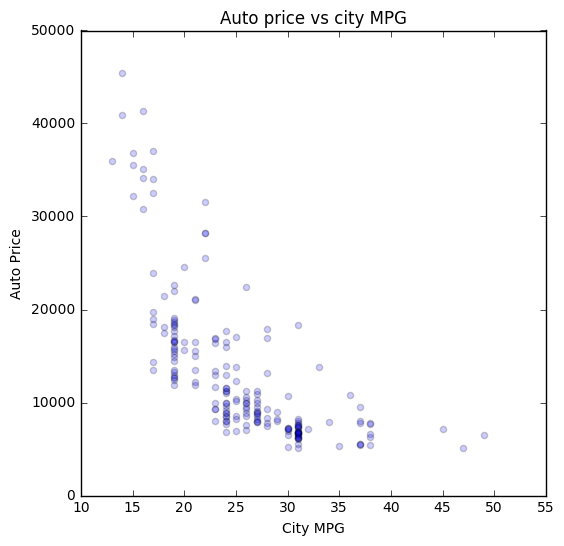

In [3]:
ax = plt.figure(figsize=(6, 6)).gca() # define axis
auto_price.plot.scatter(x = 'city-mpg', y = 'price', ax = ax, alpha = 0.2)
ax.set_title('Auto price vs city MPG') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
ax.set_xlabel('City MPG')

In the plot above, you can now see where points are over plotted. As points lies one over another, you can see the darker color of the points. 

#### 2D kernel density plot

A 2 dimensional kernel density plot works much like the 1 dimensional version we have already explored. This plot shows density of points rather that the individual points. In this way, a plot can be created very large number of points. 

In this case we will overlay the points on the kernel density plots. The code in the cell below, uses the `kdeplot` Seaborn method to compute and display a 2-d kernel density plot using a color scale. An axis is defined by the kde plot and then used to add the scatter plot and plot attributes. For the scatter plot we are using the Pandas `plot` method. Execute the code below to create the plot.

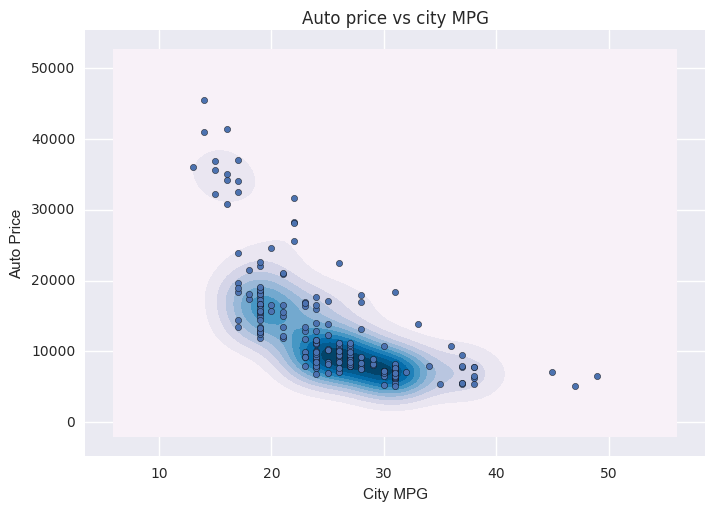

In [4]:
import seaborn as sns
ax = sns.kdeplot(auto_price.loc[:, ['city-mpg', 'price']], shade = True, cmap = 'PuBu')
auto_price.plot.scatter(x = 'city-mpg', y = 'price', ax = ax)
ax.set_title('Auto price vs city MPG') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
ax.set_xlabel('City MPG')

The 2D kernel density plot highlights the fact that the relationship betwen city MPG and price has multiple clusters of concentration. There is considerable overplotting in these regions. The points for the groups of outliers are even more promenent than before. 

#### Hexbin plot

When you have a large number of data points to plot, over-plotting becomes a significant problem. You have already explored one method for dealing with high point density, the 2-d KDE plot. The 2-d KDE plot gives a good overall view of point density, but sharp transitions tend to be obscured. A hexbin plot provides more granular detail. Even bins with a single point are displayed, which may not be the case withh a 2-d KDE plot. However, a hexbin plot can have a 'choppy' appearance. Both hexbin and 2-d KDE plots can display very high point densities. 

The hexbin plot displays the point density within hexagonal regions or bins. The plot area can be divided into a selected number of bins both vertically or horizontally. Conceptually, a hexbin plot is the 2-d equivelent of a hisogram. 

The code in the cell below uses the Pandas `hexbin` plot method to display a plot of city MPG vs. auto price. The general recipe used for this plot is the same as we have used severl times before. Execute the code below to create a hexbin plot of auto price vs. city MPG.

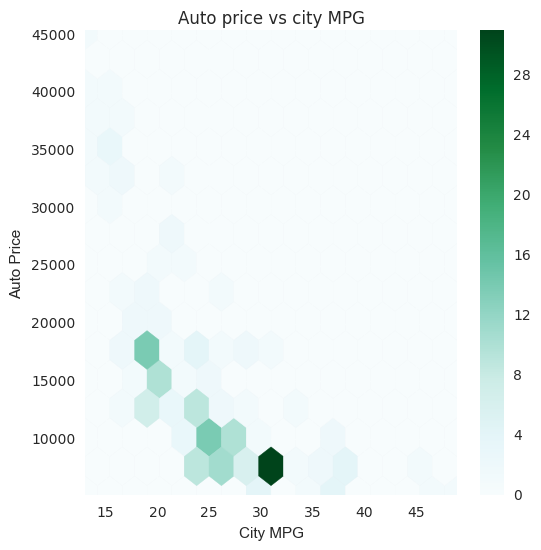

In [5]:
ax = plt.figure(figsize=(6, 6)).gca() # define axis
auto_price.plot.hexbin(x = 'city-mpg', y = 'price', gridsize = 15, ax = ax)
ax.set_title('Auto price vs city MPG') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
ax.set_xlabel('City MPG')


Examine this plot noticing the following:

- There are a large number of autos with low price and fuel economy of abouot 30-32 MPG. Some cells to the left at low price and an MPG around 25 MPG also show a concentration of autos.  
- Some outliers are clearly visible in the lower right and upper left. Some of these cells contain only one data point. As mentioned, seeing these sparse bins is a property of hexbin plots. 

**Your turn!** In the cell below create and execute the code to display a hexbin plot of the the city mpg vs horsepower. Additionally, change the `gridsize` argument to 25, which will create a more granual plot. As always, make sure your plot has meaningful axis labels and a title. 

Examine your plot. Noticing that there are several bins with concentrations, answer the following questions.
1. What is the approximate most frequent MPG and horsepower combination for these autos? 
2. What is the most frequent MPG for autos with horsepower over 150? 

### Heat maps

A heat map or raster plot allows you to visualize data which is natually arranged on a regular grid or lattice. The heat map uses colors to show the values, or heat, on the grid. Data arranged on a lattice is fairly common in many areas including, spatial analysis, image analysis, and correlation analysis. 

Python's packages have several useful plotting methods to display latice data, or data arranged in a N row X M column numeric array. In this case we will use the `pcolor` method. 

In this example we will create a heatmap of frequency of autos in price bins by the manufacturer. There are a number of preprocessing steps we must perform to create an arrary that can be displayed. 

As a first step, we will create a new feature with the price of the auto in range bins. The Pandas `cut` method allows us to create bin a numeric variable. In this case, we will use a fixed number of bins, `20`, and numeric label for each bin. Execute the code in the cell below and examine the first 10 values of the resulting feature.

In [6]:
import pandas as pd
auto_price.loc[:, 'price_bin'] = pd.cut(auto_price.loc[:, 'price'], bins = 20, labels = range(20))
auto_price.loc[:, 'price_bin'].head(10)

0     4
1     5
2     5
3     4
4     6
5     5
6     6
7     6
8     9
10    5
Name: price_bin, dtype: category
Categories (20, int64): [0 < 1 < 2 < 3 ... 16 < 17 < 18 < 19]

You can see that the prices of the cars are now in numbered bins. 

Next, we need to create an array of auto price bins by make. This is done by the following steps:

1. The `crosstab` method is used to create an array of the count of price bin by manufacturer. 
2. The number of cars by manufacturer needs to be normalized so it is in a range $\{ 0, 1 \}$. If we did not normaize manuafactures with larger numbers of models would dominate the heatmap. The normaization is done in two steps:
  - The sum of each column is computed using the `apply` method. The `apply` method applies the specified function along the axis of the data frame specified.
  - The number of autos in each array element is divided by the elements of the vector of the sum of numbers of autos using the `.div` method.
  
Execute this code and examine the head of the normalized data frame.

In [7]:
make_price = pd.crosstab(auto_price.loc[:, 'price_bin'], auto_price.loc[:, 'make'])
num_cars = make_price.apply(sum, axis = 0)
make_price = make_price.div(num_cars, axis = 1)
print(make_price.head())

make       alfa-romero      audi  bmw  chevrolet     dodge     honda  isuzu  \
price_bin                                                                     
0             0.000000  0.000000  0.0        1.0  0.444444  0.384615    0.5   
1             0.000000  0.000000  0.0        0.0  0.444444  0.384615    0.0   
2             0.000000  0.000000  0.0        0.0  0.000000  0.153846    0.5   
3             0.000000  0.000000  0.0        0.0  0.111111  0.076923    0.0   
4             0.333333  0.166667  0.0        0.0  0.000000  0.000000    0.0   

make       jaguar     mazda  mercedes-benz    ...     mitsubishi    nissan  \
price_bin                                     ...                            
0             0.0  0.307692            0.0    ...       0.307692  0.222222   
1             0.0  0.230769            0.0    ...       0.230769  0.388889   
2             0.0  0.230769            0.0    ...       0.230769  0.055556   
3             0.0  0.076923            0.0    ...       

Notice that all of the values are in the range $\{ 0, 1 \}$.

Finally, we are ready to make the heatmap plot! The code in the cell below follows the recipe we have used for other plot types. The `pcolor` method has two arguments, the array (data frame) and `cmap = 'Blue'` argument sets the pallette. Execute this code and examine the results.

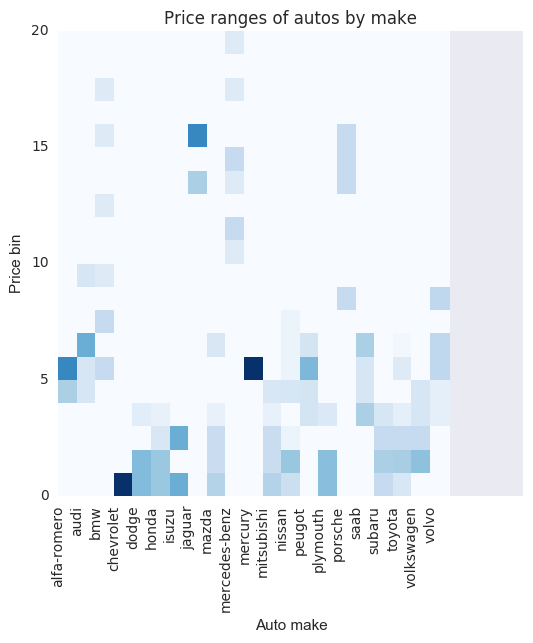

In [8]:
ax = plt.figure(figsize=(6, 6)).gca() # define axis
ax.pcolor(make_price, cmap = 'Blues')
ax.set_xticks(range(make_price.shape[1]))
ax.set_xticklabels(make_price.columns, rotation=90)
ax.set_xlabel('Auto make')
ax.set_ylabel('Price bin')
ax.set_title('Price ranges of autos by make')

Examine this heatmap. In this case, the values in the array are quite sparse. The many zeros are shown in the lightest shade of blue. In many applications the heat map will not have such a large fraction of zeros. 

The darker the shade of blue, but larger the fraction of auto models a manufacturer has in a price bin. Some examples of interpretation are:
1. Chevrolet has only one auto at the lowest price. 
2. Mercedes-Benz autos range from the middle of the range to the most expesive. 
3. BMW autos span the largest price range. 

### Line plots

Line plots are used to show the relationship between variables with ordered values. For example, line plots are used for time series data.

As a first step, you will load time series data on the monthly number of subspots betwee 1749 and 2013. This is done using the following operations:
1. Read the raw csv file.
2. Convert the string values of year and month to datetime type.
3. Use the datatime object to set the index of the Pandas Series. This creates a Pandas time series object.
4. Print the head and tail of the Pandas Series.

In [9]:
sunspots = pd.read_csv('sunspots.csv')
sunspots.loc[:, 'date'] = pd.to_datetime(sunspots.loc[:, 'date'])
sunspots.set_index('date', inplace = True)
print(sunspots.head())
print(sunspots.tail())

            spots
date             
1749-01-01   58.0
1749-02-01   62.6
1749-03-01   70.0
1749-04-01   55.7
1749-05-01   85.0
            spots
date             
2013-05-01   78.7
2013-06-01   52.5
2013-07-01   57.0
2013-08-01   66.0
2013-09-01   37.0


Now, create a line plot of this time series. With the index set to a datetime type a time series plot will be created. The axis labels and title are set in the usual manner. Execute this code and examine the results. 

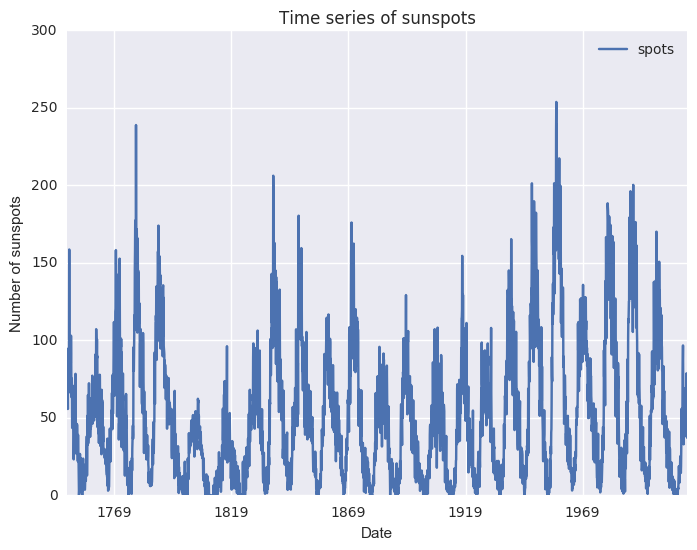

In [10]:
ax = plt.figure(figsize=(8, 6)).gca() # define axis
sunspots.plot(ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Number of sunspots')
ax.set_title('Time series of sunspots')

The plot shows the number of sunspots on the vertical axis and the datetime on the horizontal axis. 

## View multiple dimensions with aesthetics

You have explored some basic plot types. All the plots you have created are projected onto a two dimensional surface. Thus, you have been limited to visualization of only two dimensions of the data set. 

Now, you will use plot aesthetics to view additional dimensions of the data set. Specific aesthetics are used to project additonal dimensions onto a two dimensional plot surface. Additionally, carefull choice of plot aesthetics can highlight certain aspects of a data set you wish to present.   

There are many possible aesthetics one can use for visualization. Specific examples of asthetics you will work with and the data types they are useful for are shown in the table below:

| Asthetic | Data Types |
|----------|------------|
| Color | categorical|
| Size | numeric, ordered categorical |
| Marker shape | categorical |

Using aesthetics with a bit of cleverness can lead to interesting insights about a data set. 

****
**Warning!** Don't over do it! Too many colors and shapes can be confusing, obfuscating rather than enlightening. Limoiot the number of categrories you try to show with these aesthetics. 
****

### Color

Color can be used to view an additional dimension on a scatter plot. A categorical factor can be shown using different colors for the different categories. 

*****
**Caution!** Make sure you use choose a palette with distinctive colors for each cateogry. Too many categories using similar colors are invariably hard to see and imposible to interpret.   

Keep in mind, that a significant fraction of people, particularly men, are red-green color blind. Avoid this color combination.
****

The code in the cell below plots the auto price vs. city MPG with the fuel type shown by the color. The code in the cell below uses the Seaborn `lmplot` method with the following arguments:
1. The `x`, `y` and `data` arguments are self explainitory.
2. The `hue` argument sets the colors displayed by the categories of the vector specified, in this case the `fuel-type`.
3. The `pallet` argument sets the color pallet used to choose `hue`. In this case, we are using the `seismic` or red to blue pallet. 
4. The `scatter_kws` argument is used to pass a dictionary of attributes to the underlying matplotlib. In this case, only one attribute, `alpha`, the transparency, with a value of `0.3` is contained in the dictionary. 
5. The `fit_reg = False` suppresses the display of a regression line on the plot. 

Execute the code in the cell below and examine the plot. 

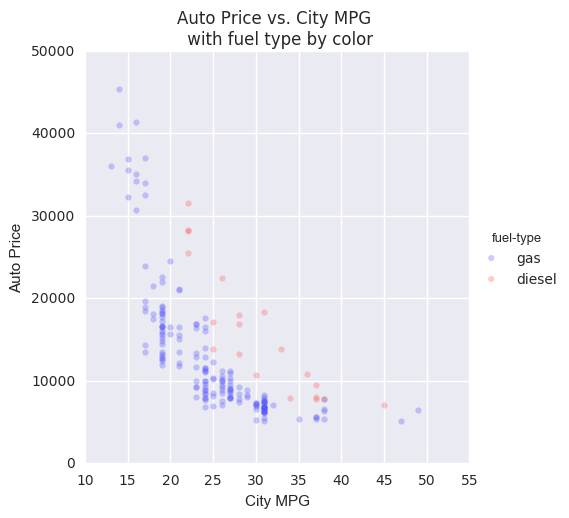

In [11]:
sns.lmplot(x = 'city-mpg', y = 'price', 
           data = auto_price, 
           hue = "fuel-type", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},
           fit_reg = False)
plt.xlabel('City MPG')
plt.ylabel('Auto Price')
plt.title('Auto Price vs. City MPG \n with fuel type by color')

You can now see the seperation between the gas and disel autos. In the above plot we can see that a diesel car is generally more costly at a given fuel efficiency. You can also see that all of the least efficient and most expensive cars have gas engines.

With the transparency set to 0.3, you can better see the density of autos in areas of the plot with significant overplotting. Most gas cars are clustered in a farily small range of price and fuel efficiency.

### Marker size

Another aesthetic which can project an additional dimension onto a two dimensional plot is marker size. Marker size is used to show the relative values of a numeric variable or an ordered categorical variable. However, human perception of size is limited, so your audience will not be able to perceive small differences.   

The code in the cell below is quite similar to the code in the previous example. The only differrence is the use of an additional attribute `s`, for marker size, in the `scatter_kws` dictionary. Execute the code in the cell below which uses the size of the marker to indicate engine size. 

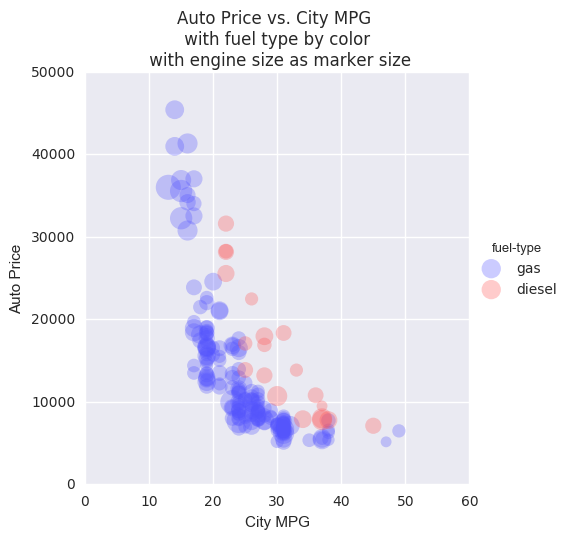

In [12]:
sns.lmplot(x = 'city-mpg', y = 'price', 
           data = auto_price, 
           hue = "fuel-type", 
           palette="seismic", 
           scatter_kws={'alpha':0.3, 
                        's': auto_price.loc[:, 'engine-size']},
           fit_reg = False)
plt.xlabel('City MPG')
plt.ylabel('Auto Price')
plt.title('Auto Price vs. City MPG \n with fuel type by color \n with engine size as marker size')

Examine the above plot noticing the different marker sizes. You can see that more expensive generally have larger engines, with a number of exceptions. With larger markers, setting transparency is more necessary than ever. 

### Marker shape

Marker shape can be used to project an additonal dimension of a categrorical variable onto a two dimensional plotting surface. Typically, different marker shapes are used to indicate the categories of a categorical variable. As with other aesthetics, don't over do it. Too many similar markers on a chart will only obfuscate the relationships you are trying to show. 

***
**Note:** You should select shapes that are clearly distinct. The more distinct the the shapes, but more likely it is that your audience will preceive the distinctions.  
***

With the commonly used Python plotting packages it is not simple to set both the marker shape and color independently. As a result, we need to plot on the same axis for each shape and color combination. To gain the control we need, the lower level seaborn `regplot` method is used. This code uses the following key steps in to make this plot:
1. Two dictionaries are defined for the marker type and color choice.
2. Within the function the figure axis is defined.
3. For loops iterate over the key values of both dictionaries; first for markers and then for colors.
4. A temporary data frame is created with the subset of the original data frame with the values appropriate for both the marker and color.
5. A seaborn `regplot` is put on the axis; one for each marker and color combination. This call largely follows the perviously used recipe, but with the following additions:
  - The `color` attribute is pasted to matplot lib. The color choice is the result of the dictionary lookup.
  - The marker used is determined by a dictionary lookup. 
  - The `ax = ax` argument places the plot for each marker and color combination on the axis. 

Execute the code in the cell below which uses different marker shapes to indicate standard and turbo aspiration cars and examine the results. 

'Done'

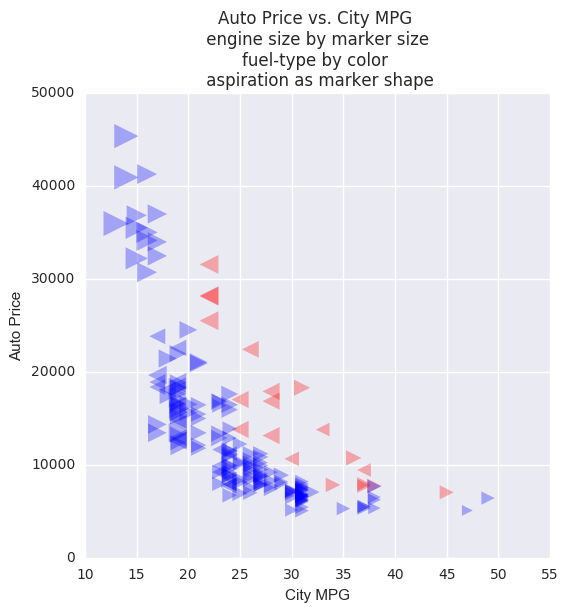

In [13]:
markers = {'std':'>', 'turbo':'<'}
fuels = {'diesel':'red', 'gas':'blue'}
def plot_shapes(df, col1, markers, col2, colors):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ax = plt.figure(figsize=(6, 6)).gca() # define axis
    for val1 in markers: # iterate over dictioary keys
        for val2 in colors: # iterate over dictionary keys
            temp = df.loc[(df.loc[:, col1] == val1) & (df.loc[:, col2] == val2), :]
            sns.regplot(x = 'city-mpg', y = 'price', 
                        data = temp,  
                        fit_reg = False, 
                        scatter_kws={'color': colors[val2],
                                     'alpha':0.3, 
                                     's': temp.loc[:, 'engine-size']},
                        marker = markers[val1],
                        ax = ax)
    plt.xlabel('City MPG')
    plt.ylabel('Auto Price')
    plt.title('Auto Price vs. City MPG \n ' + 
              'engine size by marker size \n' +
              col2 + ' by color \n ' + 
              col1 + ' as marker shape')
    return 'Done'
plot_shapes(auto_price, 'aspiration', markers, 'fuel-type', fuels)

The above plot projects five dimensions onto the two dimensional plot surface: price, city MPG, engine size, aspiration type, and fuel type. Quite a lot of information on the price drives of autos is evident in this plot.

Some conclusions we can draw from the chart above include:

- The most expensive cars have generally larger, standard aspiration, gas engines. 
- Most diesel cars use tubo aspiration and these tend to be more expensive. 
- Turbo aspiration gas engine cars are in the low range of fuel efficiency, but in the middle of the price range. 
- Most low cost cars have small standard aspiration engines.

**Your turn!** In the cell below create and execute the code to display a scatter plot of the the city mpg vs horsepower, using a low alpha value, color for aspiration, shape for  fuel type, and size for engine size. 

Examine your plot and answer the following questions:
1. Do higher horsepower diesel cars all use turbo aspiration, and why.
2. Do autos with milage over 35 MPG use turbo aspiration? 


### Aspect ratio

The aspect ratio of a plot is the ratio of the horizontal dimension to the vertical dimension. Changes in aspect ratio of a plot can have a significant effect on which aspects of a data set are most noticable. The correct aspect ratio can highlight important aspects of a relationship. On the other hand, choosing a poor aspect ratio can obfuscate important aspects of the data. 

In a pervious example you plotted the sunspot time series with an aspect ratio of 4:3. Somewhat surprisingly, this aspect ratio hides an important characteristic of these data. If you examine this plot, you will likely not be able to see the asymmetry in time. 

You will now remake this plot with an aspect ratio of 4:1. The code in the cell below plots the sunspot data with the increased aspect ratio. Execute the code below and examine the result. 

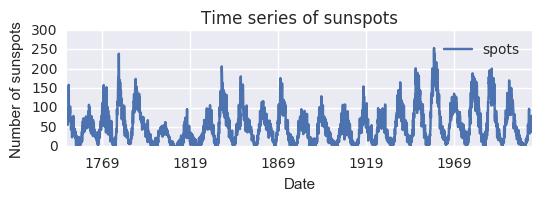

In [14]:
ax = plt.figure(figsize=(6, 1.5)).gca() # define axis
sunspots.plot(ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Number of sunspots')
ax.set_title('Time series of sunspots')

The periodic nature of the well-known sunspot cycle is clearly visible in the plot. But, how does our perception of these data change with the changing aspect ratio? 

Compare this plot to the previous one. Notice that in the lower aspect ratio plot you can now see that the sunspot intensity increases quickly, and dies off slowly for most cycles. This behavior was not visible with the pervious aspect ratio.  

## Covariance and correlation

Now, you will work with the correlations between the numeric variables.  Covariance is defined as follows:

$$cov(x,y) = E((x - \mu_x) (y - \mu_y))$$

Pearson correlation is similar to covariancec, but with normalization by the variance, and is defined as follows: 

$$cor(x,y) = \frac{E((x - \mu_x) (y - \mu_y))}{\sigma_x \sigma_y}$$

There are also non-parametric measures of correlation. One of widely used non-parametric method is Kendal's rank correlation. The Kendal correlation counts the number of values which have the same sign (concordant) and with the oposite sign (discordant). As a rank or non-parametric method, Kendal correlation is robust to outliers. Kendal's rank correlation can be computed as follows:

$$\tau = \frac{\Sigma concordant\ pairs - \Sigma disconcordant\ pairs}{n(n-1)/2}$$

***
**WARNING!** Correlation is an **unreliable** indicator of relationships between variables in a data set. While correlation can help you identify some interesting relationships in data there are several pitfalls:

1. Large correlation coefficient values can arrise from a few outliers in one or both of the variables. Always apply some visualization methods to ensure the relationship is really significant. 
2. Nonlinear relationships can be important, yet have low correlation coefficients. Again, visualization is required to examine such relationships. 
***

### Computing correlation and covariance

Execute the code in the cell below to compute the Pearson correlation for a subset of the data frame using the Pandas `cov` method. 

In [15]:
auto_price[['wheel-base', 'curb-weight', 'engine-size', 'city-mpg', 'price']].cov()

,wheel-base,curb-weight,engine-size,city-mpg,price
wheel-base,37.601894,2.518463e+03,144.747201,-19.592464,2.893918e+04
curb-weight,2518.462887,2.753267e+05,18644.525773,-2593.649485,3.532865e+06
engine-size,144.747201,1.864453e+04,1716.769389,-188.481998,2.967336e+05
city-mpg,-19.592464,-2.593649e+03,-188.481998,40.977690,-3.623861e+04
price,28939.176344,3.532865e+06,296733.640127,-36238.614036,6.490445e+07


Next, compute the correlation matrix, using the Pandas `corr` method, by executing the code in the cell below. 

In [16]:
auto_corr = auto_price[['wheel-base', 'curb-weight', 'engine-size', 'city-mpg', 'price']].corr()
auto_corr

,wheel-base,curb-weight,engine-size,city-mpg,price
wheel-base,1.000000,0.782720,0.569704,-0.499126,0.585793
curb-weight,0.782720,1.000000,0.857573,-0.772171,0.835729
engine-size,0.569704,0.857573,1.000000,-0.710624,0.888942
city-mpg,-0.499126,-0.772171,-0.710624,1.000000,-0.702685
price,0.585793,0.835729,0.888942,-0.702685,1.000000


The covariance is a bit hard to interpret since the variables are not normalized. The numberic ranges of the variables are quite different, leading to a large range of covariance values. 

The correlation matrix is a bit easier to understand, since the values are normalized by the product of the standard deviations. This normalization limits the range of correlation coefficients to $\{ -1, 1 \}$.

The diagonal values of the correlation matrix are all 1.0, as a result of the normalization. The magnitudes of the correlation values between the variables exhibit a significant range. 

In the above correlation matrix some pairs of variables are weakly correlated, with small magnitueds. For example, wheel **base** and **horsepower** are weeky correlated. Other pairs of variables are strongly correlated. For example **engine size** and **curb weight** are strongly correlated. 



## Plots for higher dimensions

You have explored basic plot types and used aesthetics to project multiple dimensions onto basic plot types. Will will now investigate ulti-axis plots project different views of a data set. We will now explore several aspects of multi-axis plots: 

- Correlation plots
- Pairwise scatter plots
- Faceted plots

### Correlation plots

With a large number of variables it can be quite difficult to understand the correlation matrix. There are a number of ways to display correlation relationships. In this lesson we will use a heatmap. 

The code in the cell below creates the heatmap plot of the correlation matrix The code uses some arguments we have not used before:
1. The `center=0` argument sets the zero point at the middle of the color scale.
2. The `square=True` argument ensure the displayed matrix is square.
3. The `linewidths=.25` puts lines between the squares of the matrix.
4. The `"shrink"` attribute of `.5` shrinks the fonts of the tick labels by 50%.
5. The matplotlib attributes rotate the text of the tick labels to ensure easy reading.

Execute the code and examine the results.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5]), <a list of 5 Text xticklabel objects>)

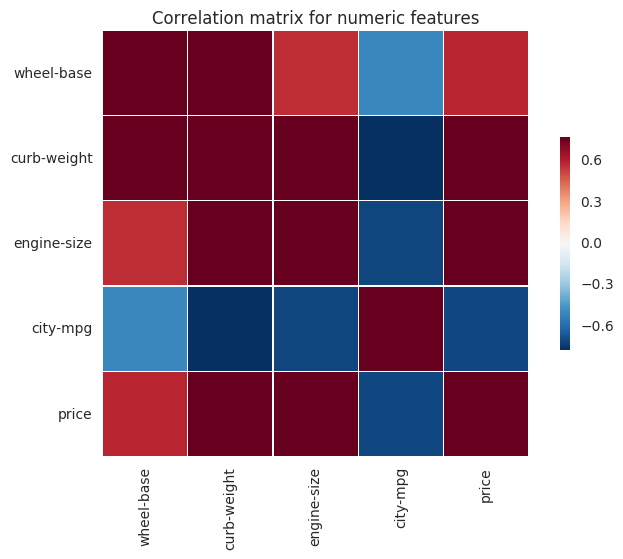

In [17]:
sns.heatmap(auto_corr, vmax=.3, center=0,
            square=True, linewidths=.25, cbar_kws={"shrink": .5})
plt.title('Correlation matrix for numeric features')
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')

Examine this plot. The darker the color the higher the correlation; positive and negative. 

### Pair wise scatter plots

Pair wise scatter plots, also know as scatter plot matrices, allow you to view multiple dimensions of a data set on one plot. A scatter plot is shown of each variable versus all other variables, arranged in an array. Another type of plot, such as a KDE plot, can be shown for each pair of variables on the diagonal. Optionally, regression lines can be added to each scatter plot. Also optionally,  other plot types, such as 2-d KDE plots, can be used for the upper or lower diagonal. 

The code in the cell below plots the scatter plot matrix for the selected variables of the data set. Some key aspects of this code includes:
1. The plot is created with the seaborn `pairplot` method.
2. The `hue` argument is used to display the fuel type.
3. The `diag_kind="kde"` argument places KDE plots along the diagonal.
4. The `map_upper` method places a different plot type on the upper diagonal, using the following arguments:
  - The plot type is specified as a seaborn `kdeplot`.
  - The color pallet is set to `"Blues"`. 
  
Execute this code and examine the results.   

In [ ]:
num_cols = ["length", "curb-weight", "engine-size", "horsepower", "city-mpg", "price", "fuel-type"] 
sns.pairplot(auto_price.loc[:, num_cols], hue='fuel-type', 
             palette="seismic", diag_kind="kde", 
             size=2).map_upper(sns.kdeplot, cmap="Blues")

There is a great deal of information on the above plot. Examine this plot, noticing at least the following:

- The KDE plots of the variables generally show a skew to the left, or lowere values. This is generally true for both fuel types. 
- Several of the variabes have a fairly linear relationship. For example, the relationships between wheel base, curb weight and engine size.
- Other relationships are clearly nonliner. For example, the relationships between price and city MPG and city MPG, and housepower. 
- Other relationships are less clear cut. For example, the relationship between price and horsepower, or price and wheelbase. 
- Several of the d-2 KDE plots show multimodal behavior, particularly relationships with length, curb weight, and engine size. 

### Facet plots

You have explored using plot asthetics to project additional dimensions onto the two dimensional plot surface. You have also used scatter plot matrices to examine the relationships in several variables Now, you will look at using facet plots or conditioned plots. 

A faceted or conditioned plot is comprised of a set of sub-plots, defined by one or more conditioning variables. This technique has also been called the **method of small multiples** by Edward Tufte. 

The data in each sub-plot are sub-setted, based on the values of the conditioning or faceting variable. This conditioning operation is, in effect, a **group-by** opertion. 

The seaborn package implements faceting through a technique known as grid-aware plotting. The seaborn `FacetGrid` method creates a grid on which you plot subsets of the data. The `col` and `row` arguments define the faceting or subsetting of the data on the grid.

The seaborn `map` method places a plpt of the specified type on the grid. In the  example below, the matplotlib `hist` plot method is used. Other plot methods could be used just as well. The data are subsetted by the `row` and `col` arguments of the grid.  

Give this a try. Execute the code below to create a single row of histograms conditioned on the type of drive wheels of the auto.

In [ ]:
gr = sns.FacetGrid(auto_price, col="drive-wheels")
gr = gr.map(plt.hist, "price")

The three histograms are displayed in the grid; one for each value of the conditioning variable, drive wheels. The labels at the top of each plot display the value of the conditioning variable. 

From these plots we can see that the price of the 4wd cars overlaps the fwd cars, and the rwd cars have a greatest range of prices.  

Let's try another example. In this case, there are two conditioning variables, fuel type and aspiration, defining a two dimensional grid. Fuel type conditions the rows. Aspiration conditions the  columns. Execute this code and examine the results.

In [ ]:
g = sns.FacetGrid(auto_price, col="aspiration", row='fuel-type')
g = g.map(plt.hist, "price")

You can see the two dimensional grid of the conditioned histograms. The titles on the top show the value of the aspiration and fuel type. The combination of aspiration and fuel type define the conditioning grid. 

Here is another example. The code in the cell below computes a grid of scatter plots conditioned by drive wheels for the column (horizontal) and body type for row (vertical) conditioning variables. The color for fuel type category is set by the `hue` and `pallette`arguments for the `FacetGrid` method. In this case, the matplotlib `scatter` method is used. Execute this code and examine the result.

In [ ]:
g = sns.FacetGrid(auto_price, 
                  col="drive-wheels", 
                  row='body-style', 
                  hue="fuel-type", 
                  palette="Set1")
g = g.map(plt.scatter, "city-mpg", "price") 

This plot projects five dimensions of the data set onto the two dimensional plot surface. Study this plot carefully, thinking about what you can learn.

**Your turn!** Create a new conditioned scatter plot using drive wheels as the column (horizontal), and body type and number of doors for the row (vertical) conditioning variables. Use shape to distinguish aspiration and color to distinguish fule type. 

Examine this plot and answer the following questions:
1. How many 8 cylinder standard aspiration cars are in the data set? 
2. Do any cars with larger numbers of cylinders (8, or 12) use turbo aspiration? 
3. In general do 4 cylindar turpo cars have more horsepower for the weight than 4 cylinder standard aspiration cars? 
5. Do diesel cars generally have greater or less horsepower for a given weight than gas cars? 

## Summary

You have covered a lot of ground in this lesson. You have explored many of the relationships in the auto price data set by creating multiple views to visualize these data. However, there  are still quite a few relationships you have not examined. For example, what about relationships with the weight or dimensions of the cars? What does new information do these introduce? In practice, you will always need to explore many dimensions of a data set for you to truely understand the important relationships. 

Specifically, in this tutoral you have:

- Applied basic bi-variate chart types to examine the relationships between pairs of variables. You used scatter plots with low alpha (transparency) values, as well as KDE and hexbin plots to overcome overplotting. 
- Used plot aesthetics to project additional dimensions onto a two dimensional plot surface, or to highlight aspects of the relationships in the data. Size is a plot asthetic useful for numeric values or ordered categorical variables. Color and marker shape are useful for categorical variables. Keep in mind to limit the number and type of categories of categorical variables. Failure to do so will result in plots with many similar colors and marker shapes, which are difficult to understand at best. 
- Used multi-axis and faceted plots to project additional dimensions onto the two dimensional plot surface. The scatter plot matrix allows you to display relationships between multiple variables on a single set of axes. In faceted plotting subsets of values (grouped values) at displayed on an array of axes. 

Finally, **have fun exploring your data!**

#### The end!